In [1]:
set.seed(123)
# Source data downloaded from the website:
# https://singlecell.broadinstitute.org/single_cell/data/public/SCP162/
expr.raw <- read.table("/stor/shiming/data/zebrafish_Farrell_Science_2018/URD_Dropseq_Expression_Log2TPM.txt"
                            ,head = T,as.is = T)
# expr.raw[1:3,1:2]
rownames(expr.raw) <- expr.raw[,1]
expr.raw[,1] <- NULL
#expr.raw[1:10, 1:6]
expr.mat <- t(expr.raw)
dim(expr.mat)
expr.mat[1:6,1:4]

[1] 38731 17239

,A2M,AAAS,AACS,AADACL4
ZFHIGH_WT_DS5_AAAAGTTGCCTC,0,0,0,0
ZFHIGH_WT_DS5_AAACAAGTGTAT,0,0,0,0
ZFHIGH_WT_DS5_AAACACCTCGTC,0,0,0,0
ZFHIGH_WT_DS5_AAATGAGGTTTN,0,0,0,0
ZFHIGH_WT_DS5_AACCCTCTCGAT,0,0,0,0
ZFHIGH_WT_DS5_AACGAAAGGTAA,0,0,0,0


In [2]:
# down sampling for computation efficiency
down.sample <- sample(x = 1:nrow(expr.mat),size = round(nrow(expr.mat)/10),replace = F)
head(down.sample)
expr.mat <- expr.mat[down.sample,] 
dim(expr.mat)

[1]  2986 29925 29710 37529  2757  9642

[1]  3873 17239

In [3]:
# Calculate the endenss on the longest path
# Initilize the parameters:
select.point <- 0   # x0
data =  expr.mat   # X 
k.nei =  10        # knei
fraction.l = 1     # L
FIG = T            # FIG

In [4]:
source('../functionsV3.R')
endv <- Endness_allpoints_paral(expr.mat, L = 1)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: iterators
Loading required package: parallel


In [1]:
# saveRDS(object = list(endv = endv, downsample = down.sample),file = 'zebrafish_development-endv_boxplot.RDS')
# readRDS(zebrafish_development-endv_boxplot.RDS')

In [2]:
# Import cluster information
meta.data.raw <- read.table("/stor/shiming/data/zebrafish_Farrell_Science_2018/URD_Dropseq_Meta.txt"
                           , head = T
                           , as.is = T
                           ) # Read meta data from file
str(meta.data.raw)
meta.data <- meta.data.raw[-1,] # Delete the redundant row 1
str(meta.data)
#identical(meta.data$NAME, tsne.data$NAME) # Match the order of cells in meta and tsne matrix
length(unique(meta.data$Stage)) # Number of stages

'data.frame':	38732 obs. of  28 variables:
 $ NAME                                  : chr  "TYPE" "ZFHIGH_WT_DS5_AAAAGTTGCCTC" "ZFHIGH_WT_DS5_AAACAAGTGTAT" "ZFHIGH_WT_DS5_AAACACCTCGTC" ...
 $ Stage                                 : chr  "group" "03.3-HIGH" "03.3-HIGH" "03.3-HIGH" ...
 $ Segment                               : chr  "group" "82" "82" "82" ...
 $ Lineage_Spinal_Cord                   : chr  "group" "TRUE" "TRUE" "TRUE" ...
 $ Lineage_Diencephalon                  : chr  "group" "TRUE" "TRUE" "TRUE" ...
 $ Lineage_Optic_Cup                     : chr  "group" "TRUE" "TRUE" "TRUE" ...
 $ Lineage_Midbrain_Neural_Crest         : chr  "group" "TRUE" "TRUE" "TRUE" ...
 $ Lineage_Hindbrain_R3                  : chr  "group" "TRUE" "TRUE" "TRUE" ...
 $ Lineage_Hindbrain_R4_5_6              : chr  "group" "TRUE" "TRUE" "TRUE" ...
 $ Lineage_Telencephalon                 : chr  "group" "TRUE" "TRUE" "TRUE" ...
 $ Lineage_Epidermis                     : chr  "group" "TRUE" "TRUE" "TR

[1] 12

[1] 0.1406640 0.9931747

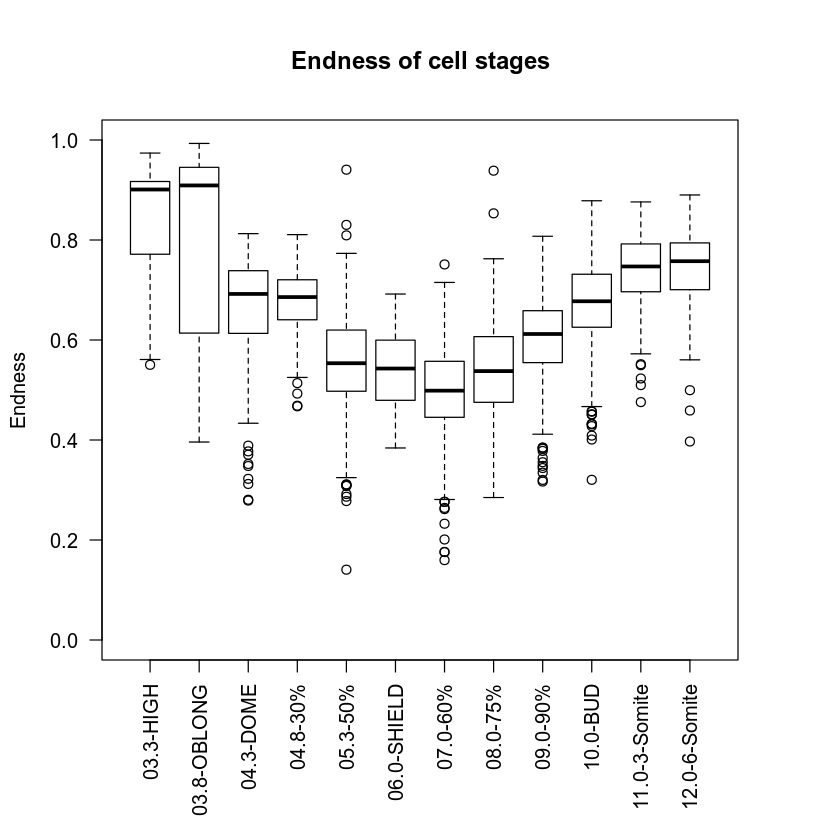

In [25]:
par(mai = c(1.5,.85,1,.85))
endv.stage <- data.frame(endv = endv, cluster = meta.data$Stage[down.sample])
f <- boxplot(endv~cluster,data = endv.stage, xlab = '', ylab = 'Endness', main = 'Endness of cell stages'
       ,ylim = c(0,1) # xlab = 'Cell stage'
       , las = 2) # Boxplot visualization
range(endv)

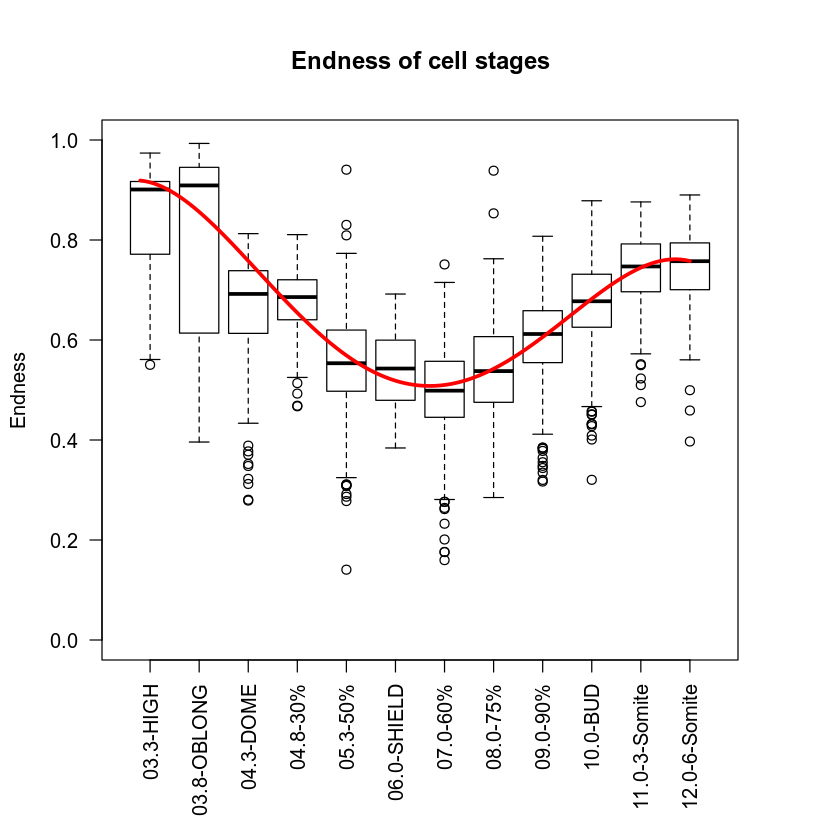

In [51]:
par(mai = c(1.5,.85,1,.85))
endv.stage <- data.frame(endv = endv, cluster = meta.data$Stage[down.sample]) # prepare the data for visualization

f <- boxplot(endv~cluster,data = endv.stage, xlab = '', ylab = 'Endness', main = 'Endness of cell stages'
       ,ylim = c(0,1) # xlab = 'Cell stage'
       , las = 2) # Boxplot visualization
medians <- f$stats[3,] # the median of endnesses
x <- 1:12
fit <- lm( medians~ x + I(x^2) + I(x^3)+I(x^4)) # polynomial curve fitting

newx <- seq(0.8,12.0,0.1) # new coordinates
newX <- cbind(rep(1,length(newx)), newx, newx^2, newx^3, newx^4 )
newy <- newX %*% coef(fit) # newy for newx
lines(newx,newy,type = 'l',col = 'red',lwd = 3)